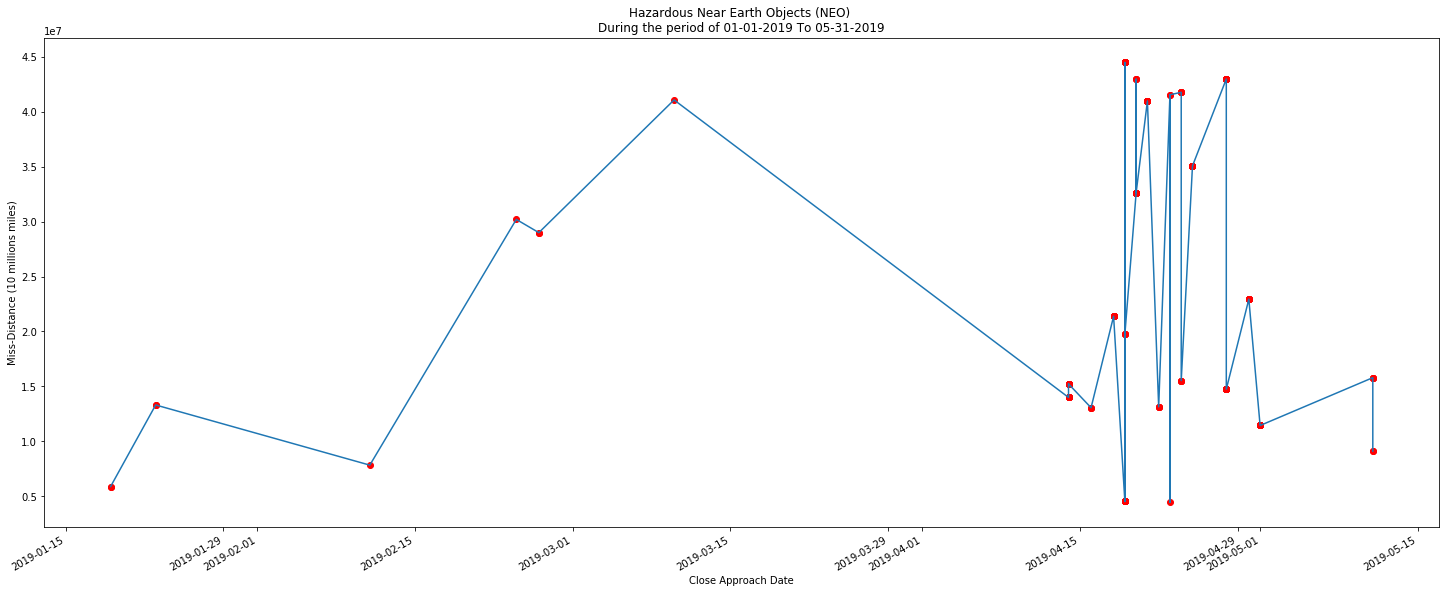

,miss_distance_miles,close_approach_date
15,5886692.0,2019-01-19
16,5886692.0,2019-01-19
19,13310942.0,2019-01-23
20,13310942.0,2019-01-23
35,7836041.5,2019-02-11
41,30195854.0,2019-02-24
42,28993916.0,2019-02-26
44,28993916.0,2019-02-26
50,41069652.0,2019-03-10
160,13998085.0,2019-04-14


In [16]:
import pandas as pd
import numpy as np
import pyarrow as pa   
import pyarrow.parquet as pq 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [25, 10]
pd.plotting.deregister_matplotlib_converters()

# Set NEO Data date range 
start_date='01-01-2019'
end_date='05-31-2019'

# Set Data souce path
dataset = pq.ParquetDataset('../data/processed/fact/neo/')
#read data into PyArrow  Table
table = dataset.read()

#Convert PyArrow table into Pandas Data Frame
df=table.to_pandas()


# Conver string date value into datetime
df['close_approach_date']=pd.to_datetime(df['close_approach_date'])
# Convert string numeric value into numeric
df['miss_distance_miles']=pd.to_numeric(df['miss_distance_miles'])

#Set data filter mask
mask = (df['is_potentially_hazardous_asteroid']==True)&(df['close_approach_date'] > start_date) & (df['close_approach_date'] <= end_date)

# Apply the mast on the data fram
df = df.loc[mask][['miss_distance_miles','close_approach_date']]

# Plot the graph
plt.plot('close_approach_date', 'miss_distance_miles', data=df)
plt.scatter(x='close_approach_date', y='miss_distance_miles', data=df,color='red')
plt.title('Hazardous Near Earth Objects (NEO) \nDuring the period of '+start_date+' To '+end_date)
plt.gcf().autofmt_xdate()
plt.xlabel('Close Approach Date')
plt.ylabel('Miss-Distance (10 millions miles)')
plt.show()
df

